# Python Visualization

by: Oleg.E.Krivosheev@gmail.com

Introduction to Python and Pandas data manipulation. Data exploration and transformation.
Basic keywords: **python**, **pandas**, **seaborn**, **visualization**, **matplotlib**

First, visualization in Jupyter notebook start with *magic* command. IPython and Jupyter were designed to work seamlessly with **matplotlib** plotting library, and any libraries built on top of **matplotlib**. Before do any plotting command, you have to set up your **matplotlib** backend. This is done by executing `%matplotlib` command. But! This will not `import` anything and won't execute any `Python` command. `%matplotlib` without any arguments will show current default backend.

Inline backed means graphs would be inlined into output cell right below input cell with some graphics related commands

In [25]:
%matplotlib inline

Notebook backend means there could be an interactive graphs embedded into notebook

In [26]:
%matplotlib notebook

`%matplotlib` without any arguments will show current default backend.

In [27]:
%matplotlib

Using matplotlib backend: nbAgg


Potential backends to play with are `%matplotlib qt` or `%matplotlib gtk`

# Import packages

In [28]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# import csv

sns.set_context("paper")

## Introduction

The main topic is data manipulation with Pandas, for example function application, groupby, aggregation and multi-indexes. All along I'll mention handy tricks that you can use for various tasks and demonstrate how we can plot results in different ways using [Seaborn](http://seaborn.pydata.org/) (based on matplotlib). Given the data format, special focus is put on time-series data manipulation.

### Plotting with matplotlib

First, several examples how to plot with **matplotlib**. Note, that there is a difference you get from `%matplotlib notebook` vs `%matplotlib inline` - integractive buttons for zoom, pan, back, save etc. If you're running `%matplotlib notebook`, you'd either have to call it before each plot, or explicitely make figure.

<IPython.core.display.Javascript object>


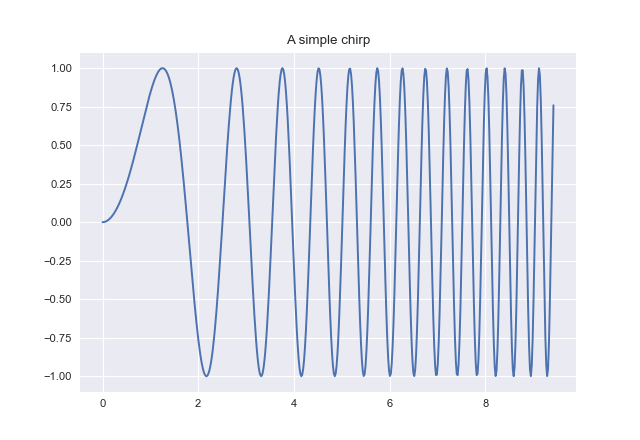

In [47]:
plt.figure() # do not remove! separate figure per cell
x = np.linspace(0, 3*np.pi, 500)
plt.plot(x, np.sin(x**2))
plt.title('A simple graph')
show()

<IPython.core.display.Javascript object>


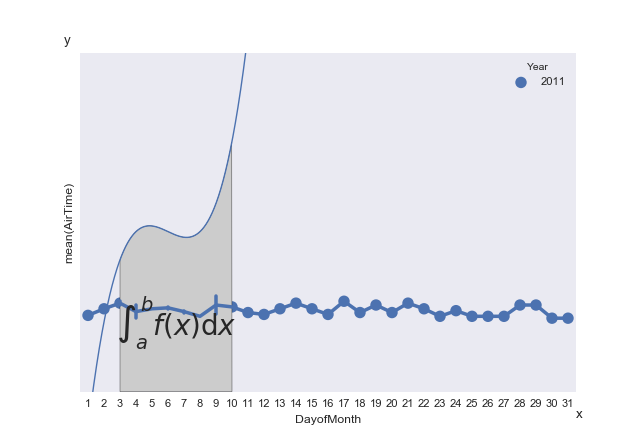

In [49]:
# %load integral.py

# implement the example graphs/integral from pyx

from pylab import *
from matplotlib.patches import Polygon

def func(x):
    return (x-3)*(x-5)*(x-7)+85

plt.figure()
ax = subplot(111)

a, b = 2, 9 # integral area
x = arange(0, 10, 0.01)
y = func(x)
plot(x, y, linewidth=1)

# make the shaded region
ix = arange(a, b, 0.01)
iy = func(ix)
verts = [(a,0)] + list(zip(ix,iy)) + [(b,0)]
poly = Polygon(verts, facecolor='0.8', edgecolor='k')
ax.add_patch(poly)

text(0.5 * (a + b), 30,
     r"$\int_a^b f(x)\mathrm{d}x$", horizontalalignment='center',
     fontsize=20)

axis([0,10, 0, 180])
figtext(0.9, 0.05, 'x')
figtext(0.1, 0.9, 'y')
ax.set_xticks((a,b))
ax.set_xticklabels(('a','b'))
ax.set_yticks([])
show()


## Load data

First, load flights information into data frame - just read CSV

In [53]:
hflights = pd.read_csv("abridged.csv")

Here one can see the data frame base statistical values.

In [54]:
hflights.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,FlightNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
count,40.0,40.0,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.0,40.00000,40.000000,40.0,0.0,40.0
mean,2011.0,1.0,13.525000,4.175000,1236.350000,1351.825000,435.200000,65.475000,43.200000,0.700000,6.350000,224.0,8.25000,14.025000,0.0,NaN,0.0
std,0.0,0.0,9.314966,2.110869,286.381541,290.498765,13.532866,6.147701,2.945662,24.237289,21.650546,0.0,3.89444,5.385105,0.0,NaN,0.0
min,2011.0,1.0,1.000000,1.000000,711.000000,805.000000,428.000000,52.000000,39.000000,-30.000000,-9.000000,224.0,3.00000,7.000000,0.0,NaN,0.0
25%,2011.0,1.0,5.750000,2.000000,1352.000000,1453.500000,428.000000,60.750000,40.750000,-13.250000,-4.250000,224.0,6.00000,10.000000,0.0,NaN,0.0
50%,2011.0,1.0,11.500000,4.000000,1357.000000,1501.000000,428.000000,64.000000,43.000000,-7.500000,-1.000000,224.0,7.00000,13.000000,0.0,NaN,0.0
75%,2011.0,1.0,21.250000,6.000000,1401.500000,1509.000000,428.000000,70.000000,45.250000,0.000000,3.500000,224.0,9.00000,17.000000,0.0,NaN,0.0
max,2011.0,1.0,31.000000,7.000000,1530.000000,1634.000000,460.000000,77.000000,51.000000,84.000000,90.000000,224.0,24.00000,28.000000,0.0,NaN,0.0


In [55]:
hflights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 21 columns):
Year                 40 non-null int64
Month                40 non-null int64
DayofMonth           40 non-null int64
DayOfWeek            40 non-null int64
DepTime              40 non-null int64
ArrTime              40 non-null int64
UniqueCarrier        40 non-null object
FlightNum            40 non-null int64
TailNum              40 non-null object
ActualElapsedTime    40 non-null int64
AirTime              40 non-null int64
ArrDelay             40 non-null int64
DepDelay             40 non-null int64
Origin               40 non-null object
Dest                 40 non-null object
Distance             40 non-null int64
TaxiIn               40 non-null int64
TaxiOut              40 non-null int64
Cancelled            40 non-null int64
CancellationCode     0 non-null float64
Diverted             40 non-null int64
dtypes: float64(1), int64(16), object(4)
memory usage: 6.6+ KB


## Filter data

<IPython.core.display.Javascript object>


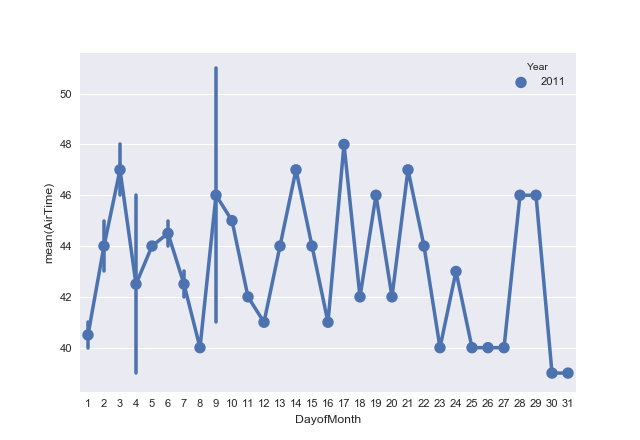

In [58]:
plt.figure()
sns.pointplot(x='DayofMonth', y='AirTime', data=hflights, hue='Year')
sns.plt.show()